A sequence of n X gates is applied, as n grows the circuit is measured

In [23]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService

service = QiskitRuntimeService()

In [54]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
from time import time

In [55]:
def getCircuitCounts(qc: QuantumCircuit, noisy=True, shots = 1024):
    backend = FakeManilaV2() if noisy else AerSimulator()

    # You can use a fixed seed to get fixed results.
    result = SamplerV2(backend).run([
        generate_preset_pass_manager(backend=backend, optimization_level=0)
            .run(qc)
    ], shots=shots).result()

    retDict = result[0].data.out.get_counts()

    return { k:retDict[k] for k in sorted(retDict) }

In [56]:
def getQC_n(nX = 0):
    qReg = QuantumRegister(1, 'Qubit')
    cReg = ClassicalRegister(1, 'out')
    qc = QuantumCircuit(qReg, cReg)
    
    for i in range(nX):
        qc.x(qReg)

    qc.measure(qReg, cReg)
    return qc

In [66]:
data = {}
for n in range(1000):
    startTime = time()
    counts = getCircuitCounts(getQC_n(n))
    correctCounts = counts[f'{n%2}']
    data[n] = correctCounts
    # print(f'{time() - startTime}')
    # print(counts)
    # print(correctCounts)

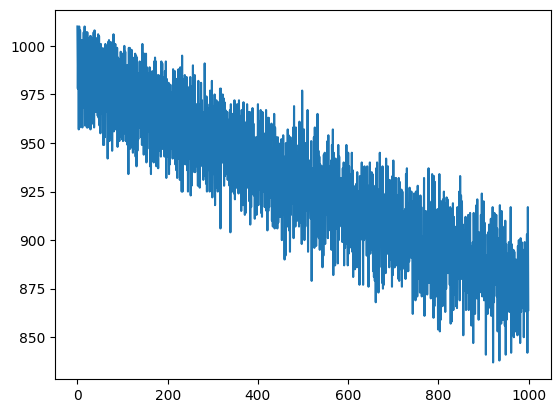

In [67]:
plt.plot(data.values())